<a href="https://colab.research.google.com/github/ishankapur/hello-world/blob/master/ns2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NS - ASSIGNMENT-2**

In [1]:
#Installing Libraries

!pip install pandasql
!pip install plotly
!pip install dash
!pip install mlxtend
import re
import json
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import pandasql as pdsql
import random
import networkx as nx

import plotly.express as px
import plotly.graph_objects as go
from tqdm.auto import tqdm
pd.set_option('max_rows',200)

## **Q1)**

Below are helper functions used for assignment-1 as well as made for calculation of shortest path length and clustering coefficient.

In [2]:
def find_cluster_coef(s,n, adj_matrix):
  nb = []
  c = 0
  for i in range(n):
    if adj_matrix[s][i]==1:
      nb.append(i)
  for i in range(len(nb)-1):
    for j in range(i+1,len(nb)):
      if adj_matrix[nb[i]][nb[j]]==1:
        c+=1
  if (len(nb)==0 or len(nb)==1):
    return 0
  return c*2/(len(nb)*(len(nb)-1))

In [3]:
def find_cc(n, adj_matrix):
  cc = []
  for i in range(n):
    cc.append(find_cluster_coef(i,n, adj_matrix))
  cc = np.array(cc)
  print("Average cluster coefficient-->", np.mean(cc))
  return np.mean(cc)

In [4]:
#function to generate lattice graph with n nodes and edges with k nearest neighbours.
def generate_lattice(n,k):
  adj_matrix = [[0 for i in range(n)] for j in range(n)]
  for i in range(n):
    for j in range(1,k+1):
      adj_matrix[i][i-j]=1
      adj_matrix[i][(i+j)%n]=1
      adj_matrix[i-j][i]=1
      adj_matrix[(i+j)%n][i]=1
  return adj_matrix

In [5]:
from queue import Queue
def BFS(s,adj_matrix,n):
  visited = [False]*n
  distance = [float('inf')]*n
  q = Queue()
  visited[s]= True
  distance[s] = 0
  q.put(s)
  while(q.qsize()>0):
    r = q.get()
    for i in range(len(adj_matrix[r])):
      if (adj_matrix[r][i]==1 and visited[i]==False):
        q.put(i)
        visited[i] = True
        distance[i] = distance[r]+1
  return distance

In [6]:
def make_adj_list(adj_matrix,n):
  arr= [[] for j in range(n)]
  for i in range(n):
    for j in range(n):
      arr[i].append(j)
      arr[j].append(i)
  return arr

In [7]:
def BFS_2(s,adj_list,n):
  visited = [False]*n
  distance = [float('inf')]*n
  q = Queue()
  visited[s]= True
  distance[s] = 0
  q.put(s)
  while(q.qsize()>0):
    r = q.get()
    for i in adj_list[r]:
      if (visited[i]==False):
        q.put(i)
        visited[i] = True
        distance[i] = distance[r]+1
  return distance

In [8]:
def floydwarshall(adj_matrix,n):
  dist = [[0 for i in range(n)] for j in range(n)]
  for i in range(n):
    for j in range(n):
      if adj_matrix[i][j]==1:
        dist[i][j]=1
      elif (i!=j):
        dist[i][j] = float('inf')
  

  for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i][j] = min(dist[i][j],dist[i][k] + dist[k][j])
  return dist

In [9]:
def cPL(n,adj_matrix):
  # dist = []
  # for i in range(n):
  #   dist.append(BFS(i,adj_matrix,n))
  dist = np.array(floydwarshall(adj_matrix,n))
  return np.ma.masked_invalid(dist).sum()/(n*(n-1))

In [10]:
def WSalgo(n,k,adj_matrix,p):
  g_m = np.array(adj_matrix,copy=True)
  
  for j in range(1,k+1):
    for i in range(n):
      pr = random.random()
      if (pr<p):
        x = random.randint(0,n-1)
        if (x!=i and g_m[i][x]!=1):
          g_m[i][x]=1
          g_m[x][i]=1
          g_m[i][(i+j)%n]=0
          g_m[(i+j)%n][i]=0
  return g_m
  

In [11]:
def make_Graphnx(n,adj_matrix):
  g = nx.Graph()
  for i in range(n):
    g.add_node(i)
  for i in range(n):
    for j in range(n):
      if (adj_matrix[i][j]==1):
        g.add_edge(i,j)
  return g

In [12]:
def plotWS(n,k,loo):
  """ the function for Watts and Strograts model i.e. generating lattice uniform graph and then swapping edges based on the probability p_arr"""
  p_arr =[0,0.0001,0.0002,0.0005, 0.0007, 0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.06, 0.08, 0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1]
  
  cp = [0]*len(p_arr)
  pl= [0]*len(p_arr)
  
  for j in tqdm(range(loo)):
    adj_matrix = generate_lattice(n,k)
    if (loo==1):
      G2= make_Graphnx(n,adj_matrix)
      pos= nx.circular_layout(G2)
      plt.figure(1)
      nx.draw_networkx(G2,pos)
      for l in range(len(p_arr)):
        g_matrix = WSalgo(n,k//2,adj_matrix,p_arr[l])
        G = make_Graphnx(n,g_matrix)
        if (l%2==0):
          print(p_arr[l])
          plt.figure(l+2)
          pos= nx.circular_layout(G)
          nx.draw_networkx(G, pos=pos)
        cp[l]+=nx.average_clustering(G)
        pl[l]+=nx.average_shortest_path_length(G)
      plt.show()
    else:
      for l in range(len(p_arr)):
        g_matrix = WSalgo(n,k//2,adj_matrix,p_arr[l])
        G = make_Graphnx(n,g_matrix)
        # pos= nx.circular_layout(G)
        # nx.draw_networkx(G, pos=pos)
        cp[l]+=nx.average_clustering(G)
        pl[l]+=nx.average_shortest_path_length(G)
  
  cp1 = cp[0]
  pl1 = pl[0]
  for i in range(len(p_arr)):
    cp[i] = cp[i]/cp1
    pl[i] = pl[i]/pl1
  fig = go.Figure()
  fig.update_layout(
  title="‘Clustering Coefficient’ versus ‘p’",
  xaxis_title="probability - p ",
  yaxis_title=" Ratio between 0 to 1",
  )
  fig.add_traces(go.Scatter(name="scaled cluster coefficient",x=p_arr, y=cp, mode='lines'))
  fig.add_traces(go.Scatter(name="scaled characterstic path length",x=p_arr, y=pl, mode='lines'))
  fig.update_xaxes(type="log")
  
  fig.show()

Below are plots for n=20 and k=4 to show the graph using networkX.

  0%|          | 0/1 [00:00<?, ?it/s]

0
0.0002
0.0007
0.002
0.01
0.03
0.08
0.2
0.4
0.6
0.8
1


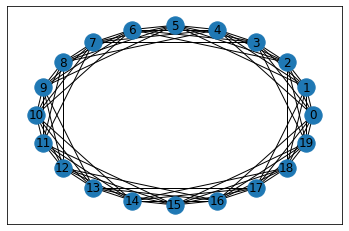

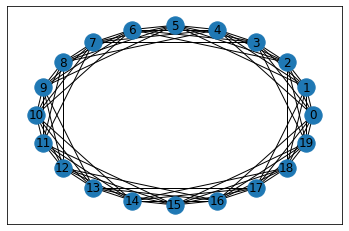

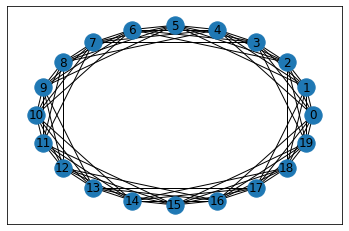

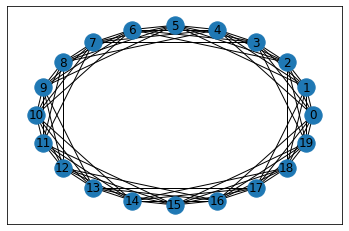

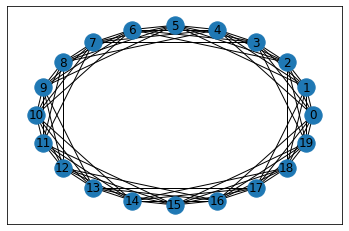

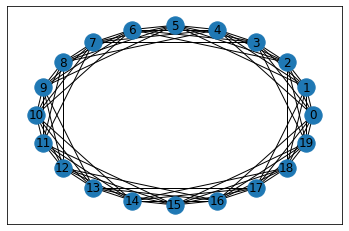

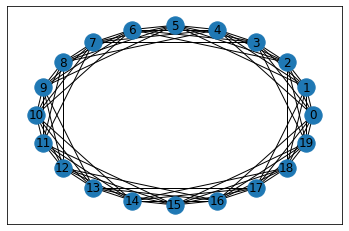

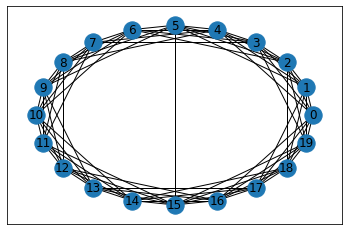

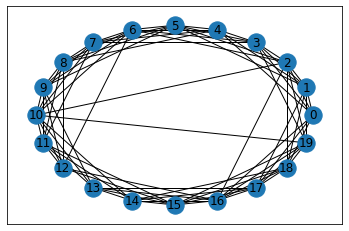

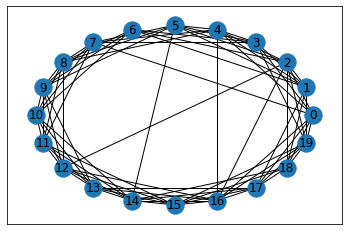

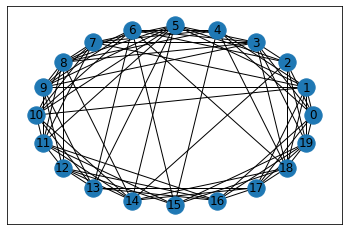

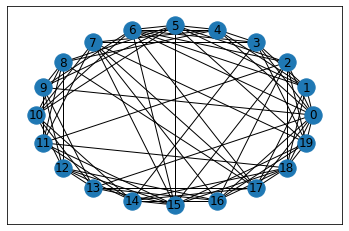

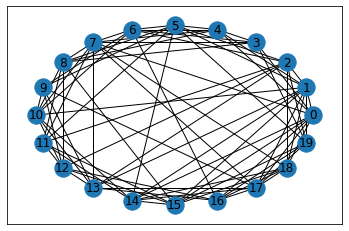

In [24]:
plotWS(20,4,1)

This shows the plot for n=200, k = 8 and 100 instances are averaged out.

In [14]:
plotWS(200,8,100)

  0%|          | 0/100 [00:00<?, ?it/s]

## **Q2**

In [15]:
def make_gilbert(N,P):
  #function to generate gilbert graph
  adj = [[0 for i in range(N)] for j in range(N)]
  for i in range(N):
    for j in range(N):
      x = random.random()
      if (x<P):
        adj[i][j]=1
  return adj

In [16]:
def edgtoadj(n,edge_list):
  adj_matrix = [[0 for i in range(n)] for j in range(n)]
  for i in edge_list:
    adj_matrix[i[0]][i[1]]=1
  return adj_matrix

In [17]:
def BAmodel(n,edges,steps,max_e,pow):
  '''function for BA model'''
  fig = go.Figure()
  fig.update_layout(
  title="Degree distribution of graph generated through BA model (log/log) scale",
  xaxis_title="degree-k ",
  yaxis_title="Probability pk",
  )
  for op in range(1,max_e+2,2):

    d = []
    cc= []
    apl = []
    for t in tqdm(range(100)):
      adj = make_gilbert(n,edges*2/(n*(n-1)))
      eglist = []
      for j in range(n):
        for k in range(n):
          if (adj[j][k]==1):
            eglist.append((j,k))
      degres = np.sum(adj,axis=1)
      
      dic_deg = {}
      for i in range(n):
        dic_deg[i]= degres[i]**pow
      
      for i in range(steps):
        # edg = random.randint(1,max_e)
        edg = op
        dic_sorted = dict(sorted(dic_deg.items(), key=lambda item: item[1], reverse=True))
        
        
        sumd = sum(dic_sorted.values())
        
        r = 1
        for k in dic_sorted.keys():
          dic_sorted[k] = dic_sorted[k]/sumd
          dic_sorted[k] = r - dic_sorted[k]
          r = dic_sorted[k]
        vis=set([])
        l=0
        while(l<edg):
          fo = False
          p = random.random()
          prev = 0
          for j in dic_sorted.keys():
            if p>=dic_sorted[j] and j not in vis:
              prev = j
              
              fo = True
              break;
            prev = j
          if (fo):
            vis.add(prev)
            dic_deg[prev]+=1
            eglist.append((prev,i+n))
            eglist.append((i+n,prev))
            l+=1
        dic_deg[i+n]=edg
      adj_matrix = edgtoadj(n+steps,eglist)
      G = make_Graphnx(n+steps,adj_matrix)
      cc.append(nx.average_clustering(G))
      apl.append(nx.average_shortest_path_length(G))
      degrees = np.sum(adj_matrix,axis=1)
      dgg = []
      for i in range(n+steps):
        dgg.append(np.count_nonzero(degrees == i))
      d.append(dgg)
    print("Average clustering coefficient  for m="+str(op), np.array(cc).mean())
    print("Average shortest path length for m="+str(op),np.array(apl).mean())
    d = np.array(d)
    ans_g = np.sum(d,axis=0)/100
    ans_g = ans_g/np.sum(ans_g)
    
    z = len(ans_g)-1
    while(ans_g[z]==0):
      z-=1
    
    fig.add_traces(go.Scatter(x=np.array([i for i in range(op,z+1)]), y=np.array(ans_g[op:z+1]), mode='markers', name="m="+str(op)))
  fig.update_xaxes(type="log")
  fig.update_yaxes(type="log")
  fig.show()

BA model for n=10, edges = 36 or p = 35/45 = 0.78 , number of nodes to be added = 1000, and max m =7 (1,3,5,7)

In [18]:
BAmodel(10,35,1000,7,1)

  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for m=1 0.0005148680006020836
Average shortest path length for m=1 5.227117173164293


  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for m=3 0.04491888622383637
Average shortest path length for m=3 3.3983303535507168


  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for m=5 0.04763693628663175
Average shortest path length for m=5 2.9539762729493964


  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for m=7 0.054750585697208295
Average shortest path length for m=7 2.730593843527068


BA model for n=10, edges = 36 or p = 36/45 = 0.8 , number of nodes to be added = 1500, and max  m =7 (1,3,5,7)

In [19]:
BAmodel(10,36,1500,7,1)

  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for m=1 0.00024745249160078845
Average shortest path length for m=1 5.588135548738474


  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for m=3 0.033539929161719745
Average shortest path length for m=3 3.5389077806889344


  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for m=5 0.035394898294593406
Average shortest path length for m=5 3.0736698221268415


  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for m=7 0.0406300756711106
Average shortest path length for m=7 2.831565766548611


BA model for n=10, edges = 36 or p = 36/45 = 0.8 , number of nodes to be added = 1500, and max  m =7 (1,3,5,7)

In [20]:
BAmodel(10,36,1000,3,2)

  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for m=1 0.00016470617933679423
Average shortest path length for m=1 3.749279886957973


  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for m=3 0.1880097155009612
Average shortest path length for m=3 2.881599348438312


In [21]:
def BAmodel_q3(n,edges,steps,max_e,pow):
  fig = go.Figure()
  fig.update_layout(
  title="Degree distribution of graph generated through BA model (log/log) scale",
  xaxis_title="degree-k ",
  yaxis_title="Probability pk",
  )
  for powe in range(1,pow+1):
    d = []
    cc= []
    apl = []
    for t in tqdm(range(100)):
      adj = make_gilbert(n,edges*2/(n*(n-1)))
      eglist = []
      for j in range(n):
        for k in range(n):
          if (adj[j][k]==1):
            eglist.append((j,k))
      degres = np.sum(adj,axis=1)
      
      dic_deg = {}
      for i in range(n):
        dic_deg[i]= degres[i]**powe
      
      for i in range(steps):
        # edg = random.randint(1,max_e)
        edg = max_e
        dic_sorted = dict(sorted(dic_deg.items(), key=lambda item: item[1], reverse=True))
        
        
        sumd = sum(dic_sorted.values())
        
        r = 1
        for k in dic_sorted.keys():
          dic_sorted[k] = dic_sorted[k]/sumd
          dic_sorted[k] = r - dic_sorted[k]
          r = dic_sorted[k]
        vis=set([])
        l=0
        while(l<edg):
          fo = False
          p = random.random()
          prev = 0
          for j in dic_sorted.keys():
            if p>=dic_sorted[j] and j not in vis:
              prev = j
              
              fo = True
              break;
            prev = j
          if (fo):
            vis.add(prev)
            dic_deg[prev]+=1
            eglist.append((prev,i+n))
            eglist.append((i+n,prev))
            l+=1
        dic_deg[i+n]=edg
      adj_matrix = edgtoadj(n+steps,eglist)
      G = make_Graphnx(n+steps,adj_matrix)
      cc.append(nx.average_clustering(G))
      apl.append(nx.average_shortest_path_length(G))
      degrees = np.sum(adj_matrix,axis=1)
      dgg = []
      for i in range(n+steps):
        dgg.append(np.count_nonzero(degrees == i))
      d.append(dgg)
    print("Average clustering coefficient  for order="+str(powe), np.array(cc).mean())
    print("Average shortest path length for order="+str(powe),np.array(apl).mean())
    d = np.array(d)
    ans_g = np.sum(d,axis=0)/100
    ans_g = ans_g/np.sum(ans_g)
    
    z = len(ans_g)-1
    while(ans_g[z]==0):
      z-=1
    
    fig.add_traces(go.Scatter(x=np.array([i for i in range(max_e,z+1)]), y=np.array(ans_g[max_e:z+1]), mode='markers', name="order="+str(powe)))
  fig.update_xaxes(type="log")
  fig.update_yaxes(type="log")
  fig.show()

BA model of higher degrees till ORDER 4 for m=3

In [22]:
BAmodel_q3(10,36,1000,3,4)

  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for order=1 0.04622193323713731
Average shortest path length for order=1 3.389847942772473


  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for order=2 0.18616407363501267
Average shortest path length for order=2 2.885270368662238


  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for order=3 0.5959114132691089
Average shortest path length for order=3 2.429683384195704


  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for order=4 0.8954698669398183
Average shortest path length for order=4 2.229403036041959


BA model of higher degrees till order 4 for m=5

In [23]:
BAmodel_q3(10,36,1000,5,4)

  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for order=1 0.04766953763498445
Average shortest path length for order=1 2.9529655673198643


  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for order=2 0.16053661946894351
Average shortest path length for order=2 2.6275043028584326


  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for order=3 0.540446877722992
Average shortest path length for order=3 2.14309083594187


  0%|          | 0/100 [00:00<?, ?it/s]

Average clustering coefficient  for order=4 0.8810885506104255
Average shortest path length for order=4 2.001470154745901
